In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import scipy.stats as stats 
import warnings
import pylab 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_harvey_collier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pdInputData = pd.read_excel("ProjectInputData.xlsx")

X = pdInputData[['gold', "oil", "JPM"]]
y = pdInputData['Close_ETF']  

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

results = model.fit()
print(results.params)
print(results.summary())
X_test = sm.add_constant(X_test) 
y_pred = results.predict(X_test)

const    121.046690
gold      18.293780
oil       -2.101395
JPM       30.555632
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2948
Date:                Sat, 15 May 2021   Prob (F-statistic):              0.829
Time:                        10:35:48   Log-Likelihood:                -3155.4
No. Observations:                 800   AIC:                             6319.
Df Residuals:                     796   BIC:                             6338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [3]:
# assumptions: 
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.0031383509671111254

In [4]:
VIF = 1 / (1 - R2)
VIF

1.0031482312216102

In [5]:
# Incase only one input variable and output variable
pdInputData[["Close_ETF", "gold", "oil"]].corr() 

,Close_ETF,gold,oil
Close_ETF,1.000000,0.022996,-0.009045
gold,0.022996,1.000000,0.235650
oil,-0.009045,0.235650,1.000000


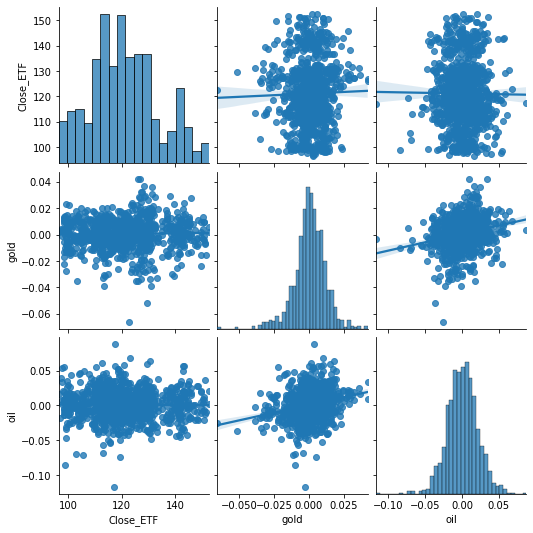

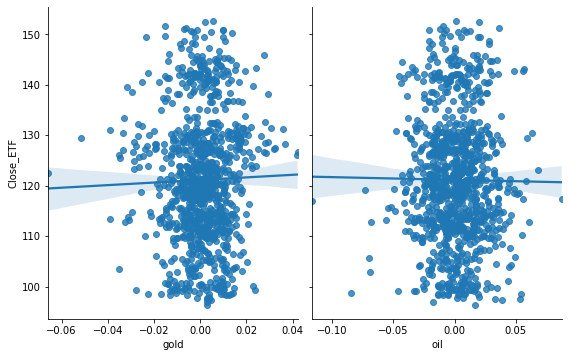

In [6]:
#Plot pairwise relationships in a dataset 
sns.pairplot(pdInputData[["Close_ETF", "gold", "oil"]], kind ='reg') 
sns.pairplot(pdInputData , x_vars=["gold", "oil"], y_vars=["Close_ETF"],
             height=5, aspect=.8, kind="reg");

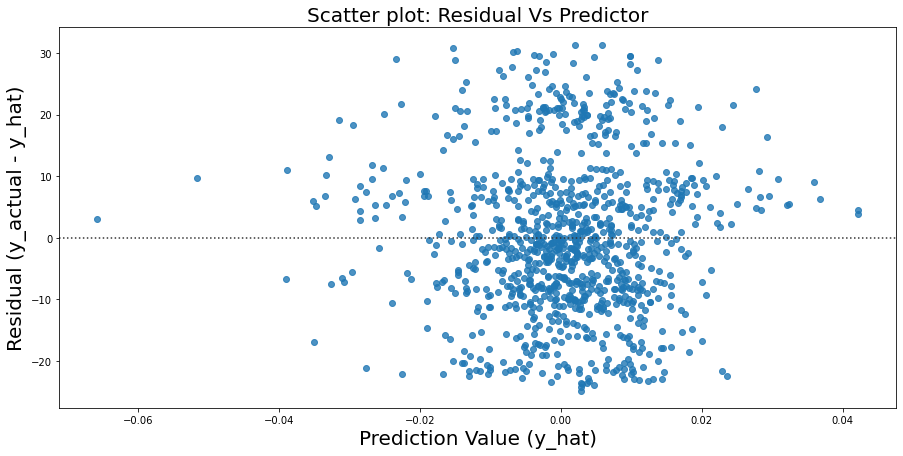

In [7]:
plt.figure(figsize=(15,7))
sns.residplot(x = 'gold',
              y = "Close_ETF", 
              data = pdInputData)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual (y_actual - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Vs Predictor", fontsize = 20)
plt.show()

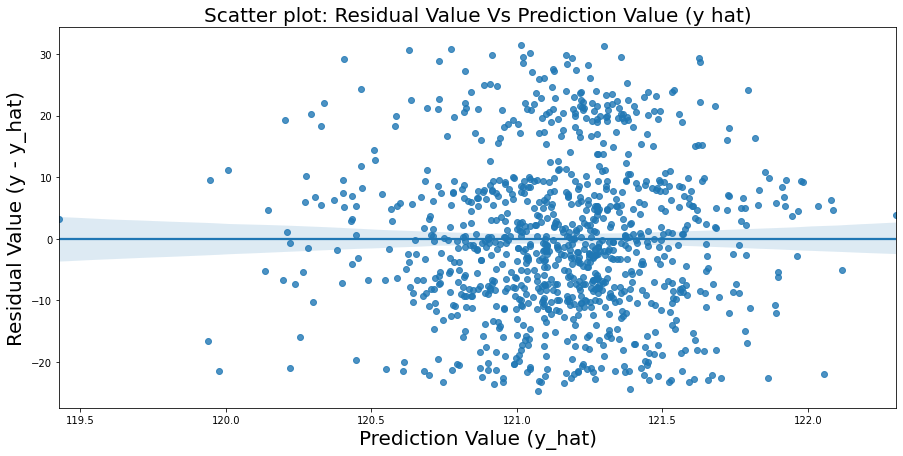

Mean of resudual is: -5.3660187404602763e-14


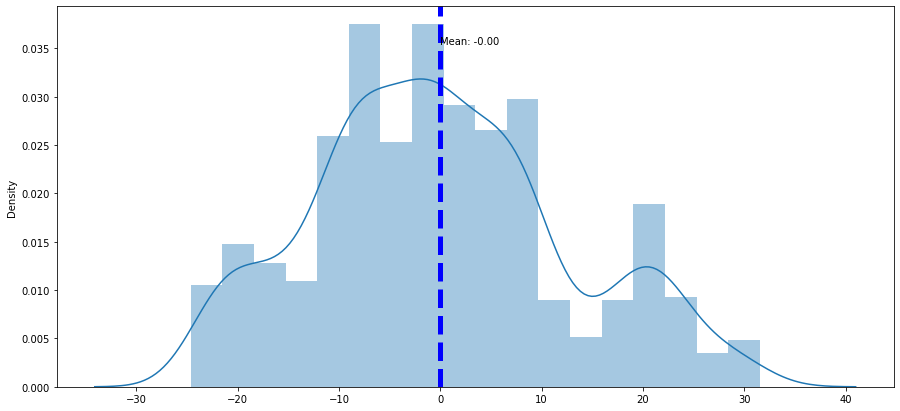

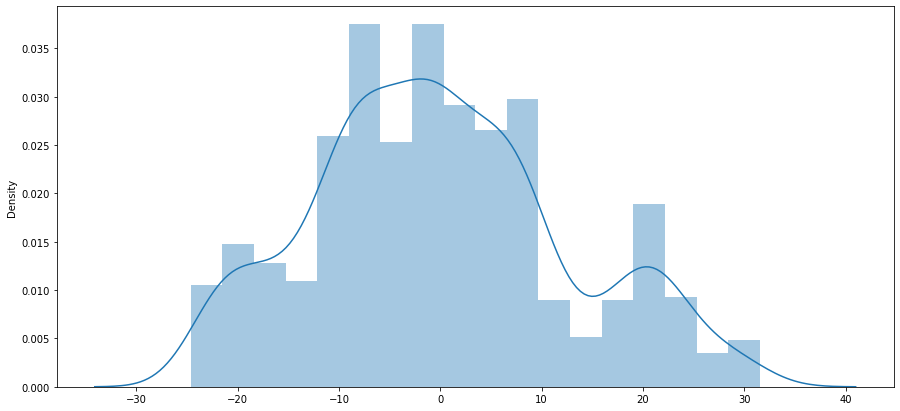

In [8]:
X = pdInputData[["gold", "oil"]]
y = pdInputData['Close_ETF']  


X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

results = model.fit()
results.params

# Now making prediction for the test data
# align test data for the prediction
X= sm.add_constant(X) 
y_pred = results.predict(X)
serResidual = y - y_pred
plt.figure(figsize=(15,7))
sns.regplot(x=y_pred,y=serResidual)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()


plt.figure(figsize=(15,7))
ax = sns.distplot(serResidual)
plt.axvline(np.mean(serResidual), color="b", linestyle="dashed", linewidth=5)
_, max_ = plt.ylim()
plt.text(        serResidual.mean() + serResidual.mean() / 10, max_ - max_ / 10, "Mean: {:.2f}".format(serResidual.mean()),
    )

plt.figure(figsize=(15,7))
sns.distplot(serResidual)
print("Mean of resudual is:", serResidual.mean())

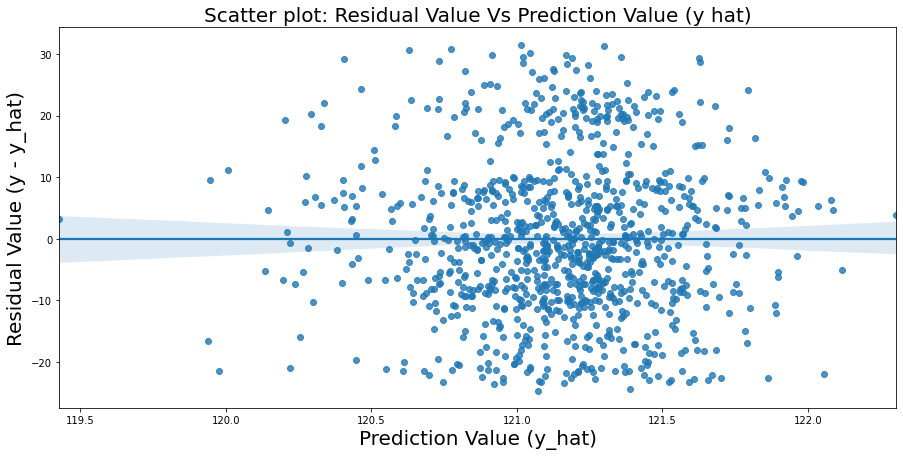

In [9]:
plt.figure(figsize=(15,7))
sns.regplot(x=y_pred,y=serResidual)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()

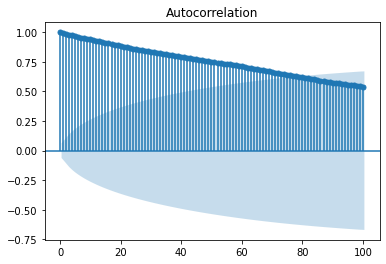

In [10]:
# In addition to above we can use following too:
acf = smt.graphics.plot_acf(serResidual, lags=100, alpha=0.05)
acf.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


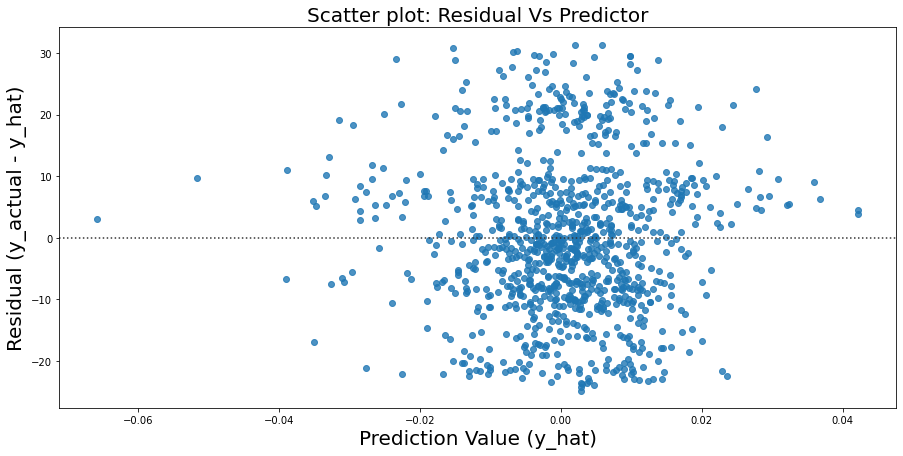

In [11]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')

    # Plotting the residuals

    plt.figure(figsize=(15,7))
    sns.residplot(x = 'gold',
                  y = "Close_ETF", 
                  data = pdInputData)
    plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
    plt.ylabel("Residual (y_actual - y_hat)", fontsize = 20)
    plt.title("Scatter plot: Residual Vs Predictor", fontsize = 20)
    plt.show()
homoscedasticity_assumption(model, pdInputData[["gold", "oil"]], 
                            pdInputData["Close_ETF"])

In [12]:
R2 = r2_score(y, y_pred)
print(R2)

VIF = 1 / (1 - R2)
print(VIF)

#calculate VIF for each explanatory variable
def get_vif(X_features):    
    pdVif = pd.DataFrame()
    pdVif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    pdVif['variable'] = X.columns
    return pdVif

def get_tolerance_value(pdVif):
    pdVif = get_vif(X_features)
    return 1/pdVif['VIF'] 
X_features = pdInputData[["gold", "oil"]]
pdVif = get_vif(X_features)
pdVif['Tolerance'] = get_tolerance_value(pdVif)
pdVif

0.0007502966608660122
1.0007508600286383


,VIF,variable,Tolerance
0,1.004749,const,0.995273
1,1.058796,gold,0.944469
2,1.058796,oil,0.944469


In [13]:
X = pdInputData[['gold', "oil"]]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pdVif = pd.DataFrame({'vif': vif[0:]}, index=X.columns).T
pdVif

,gold,oil
vif,1.059952,1.059952


In [14]:
print("For Gold the tolerance is: ", 1/pdVif['gold']['vif'])
print("For Oil the tolerance is: ", 1/pdVif['oil']['vif'])

For Gold the tolerance is:  0.9434386482198437
For Oil the tolerance is:  0.9434386482198436
